In [4]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pareto
import random
import functions as f

In [2]:
#GLOBAL CONSTANTS
clv_thoery = 10 
size= 10000 # size of each sample
n = 10000 # number of samples
DureeObs = 12*2 # duration of observation

## PARETO (not censored)

In [27]:
shape = 3
scale = 1
size=10000
n=10000
duree_obs = 12*2
clv_theory = (shape * scale) /(shape - 1 )

In [3]:
def generate_nc_pareto(clv_th, size):
    shape = 3

    T = pareto.rvs(shape, scale = 1, size=size) 

    return T

In [37]:
def generate_c_pareto(clv_th, size, obs_duration):
    shape = 3
    #T = (np.random.pareto(a=shape, size=size) + 1 ) * scale  # pareto 2 
    T = pareto.rvs(shape, scale = 1, size=size) 
    ancient = obs_duration* np.random.rand(size) +1   # uniform distribution
    Y = T * (T <= ancient) + ancient * (T > ancient)
    return Y, ancient

In [5]:
def pareto_nc_clv_estimator(Y):
    n = len(Y)
    denom = 1 - (1/n)*(np.sum(np.log(Y)))
    return 1 / denom

In [6]:
def pareto_c_clv_estimator(Y, ancient):
    n = len(Y) - len(np.where(Y==ancient)[0])
    denom = 1 - (1/n)*(np.sum(np.log(Y)))
    return 1 / denom

In [47]:
def CI_pareto_c_clv(a,Y,ancient):

    len_A = len(np.where(Y!=ancient)[0])
    lower = 1- (np.sum(np.log(Y)) / (len_A - 1.96* np.sqrt(len_A)))
    upper = 1- (np.sum(np.log(Y)) / (len_A + 1.96* np.sqrt(len_A)))
    
    return 1/lower, 1/upper

<AxesSubplot: ylabel='Count'>

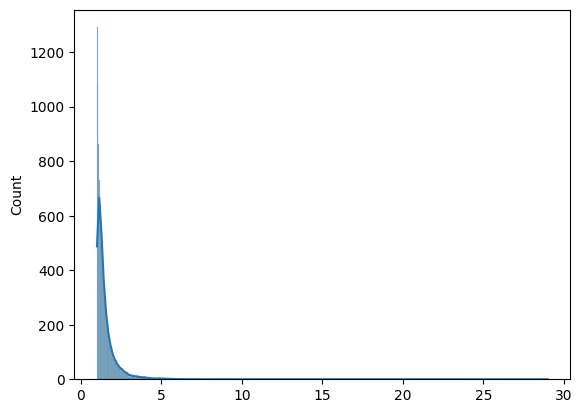

In [25]:
Tn = generate_nc_pareto(clv_theory, size)
sns.histplot(Tn, kde = True)

In [28]:
# CONSTANT desining if the data is going to be censored or not
censored = 0
# Monte Carlo simulation
clv_pareto, Y_n = f.monte_carlo(clv_theory, size, n, censored, pareto_nc_clv_estimator, generate_nc_pareto)

CONVERGENCE :
 	 size of each dataset =10000 
 	 number of datasets =10000 
 	 CLV thoery = 1.50 
 	 CLV real = 1.500010  
 	 Standard deviation CLV= 0.007533


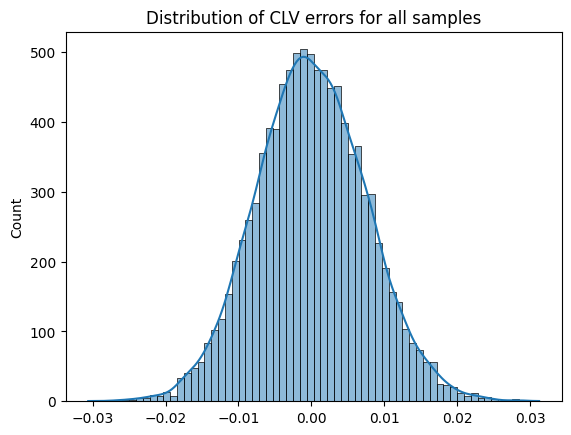

In [29]:
# plot clv errors distribution
f.print_conv_plot_distribution(size, n ,clv_theory, clv_pareto)

For all the samples $Y_i$ for $i\in \{1,...,n\}$ the prediction error $(prediction_i - expectation_i)$ folllows a gaussian distribution with mean 0.


In [ ]:
lower_pareto_nc, upper_pareto_nc =f.bootstrap_intervals(Y_n, censored , np.mean)

In [ ]:
# plot confidence interval
f.CI_multiplot(clv_pareto, lower_pareto_nc, upper_pareto_nc)

# Pareto (censored)

<AxesSubplot: ylabel='Count'>

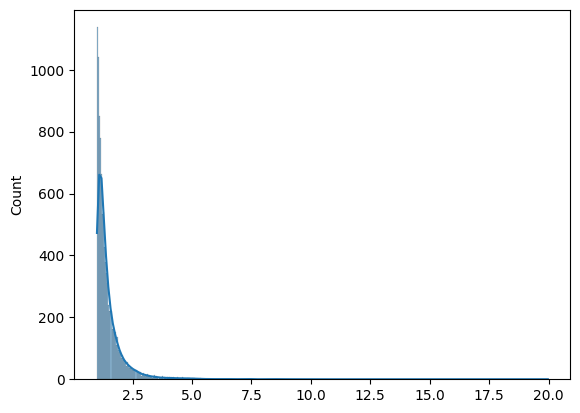

In [38]:
Yn, ancient = generate_c_pareto(clv_theory, size, duree_obs)
sns.histplot(Yn, kde = True)

In [39]:
# CONSTANT desining if the data is going to be censored or not
censored = 1
# Monte Carlo simulation
clv_pareto, Y_n = f.monte_carlo(clv_theory, size, n, censored, f.pareto_c_clv_estimator, f.generate_c_pareto)

CONVERGENCE :
 	 size of each dataset =10000 
 	 number of datasets =10000 
 	 CLV thoery = 1.50 
 	 CLV real = 1.499945  
 	 Standard deviation CLV= 0.007539


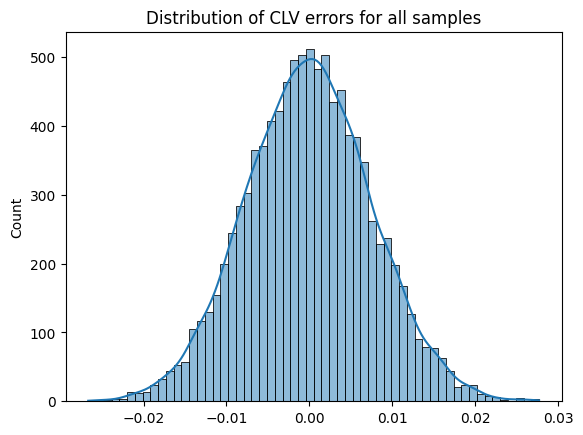

In [40]:
# plot clv errors distribution
f.print_conv_plot_distribution(size, n ,clv_theory, clv_pareto)

####IC Theorique de la pareto

In [45]:
a=5

In [48]:
CI_pareto_c_clv(a,Y_n,ancient)

(-2.942657898623179, -2.945876851109216)

In [ ]:
Y = generate_pareto(scale, size, DureeObs)
sns.histplot(Y, kde = True)

In [ ]:
def generate_real_data(CLV, n, DureeObs):
    # GENERATOR WITH TWO PARETO DISTRIBUTION
    # Parameters
    n = 10000
    DureeObs = 12*2

    moyenne1 = 4  # Mean in the first group
    shape1 = 0.1  # Small shape: close to exponential distribution

    moyenne2 = 9  # Mean in the second group
    shape2 = 0.4  # Larger shape: heavy-tailed distribution

    ratio_classe = 0.3  # Proportion of clients in the first group in the dataset

    # Expectation across both groups
    CLV = ratio_classe*moyenne1+(1-ratio_classe)*moyenne2

    # Data generation
    location1 = 0
    scale = moyenne1*(1-shape1)-location1
    T1 = np.random.gamma(shape1, scale, n)

    location2 = 0
    scale = moyenne2*(1-shape2)-location2
    T2 = np.random.gamma(shape2, scale, n)

    ber = np.random.rand(n) > ratio_classe

    T = (1-ber)*T1 + ber*T2

    Duree_depuis_souscription = DureeObs * np.random.rand(n)
    Y = T*(T<Duree_depuis_souscription)
    #Y = np.where(T<Duree_depuis_souscription, T, np.nan)
    Y = np.where(T<Duree_depuis_souscription, T, Duree_depuis_souscription)
    return Y, Duree_depuis_souscription

    #The data is now (Y, Duree_depuis_souscription)

In [ ]:
# GENERATOR WITH TWO PARETO DISTRIBUTION
# Parameters
n = 10000
DureeObs = 12*2

moyenne1 = 4  # Mean in the first group
shape1 = 0.1  # Small shape: close to exponential distribution

moyenne2 = 9  # Mean in the second group
shape2 = 0.4  # Larger shape: heavy-tailed distribution

ratio_classe = 0.3  # Proportion of clients in the first group in the dataset

# Expectation across both groups
CLV = ratio_classe*moyenne1+(1-ratio_classe)*moyenne2

# Data generation
location1 = 0
scale = moyenne1*(1-shape1)-location1
T1 = np.random.gamma(shape1, scale, n)

location2 = 0
scale = moyenne2*(1-shape2)-location2
T2 = np.random.gamma(shape2, scale, n)

ber = np.random.rand(n) > ratio_classe

T = (1-ber)*T1 + ber*T2

Duree_depuis_souscription = DureeObs * np.random.rand(n)
Y = T*(T<Duree_depuis_souscription)
#Y = np.where(T<Duree_depuis_souscription, T, np.nan)
Y = np.where(T<Duree_depuis_souscription, T, Duree_depuis_souscription)


#The data is now (Y, Duree_depuis_souscription)

In [ ]:
sns.histplot(Y, kde=True)

In [ ]:
pareto_clv_estimator(Y, Duree_depuis_souscription)

In [ ]:
geom_c_clv_estimator(Y, Duree_depuis_souscription)

In [ ]:
# CONSTANT
censored = 1
# Monte Carlo simulation
clv_geom_c, Y_n = monte_carlo(CLV, size, n, censored, geom_c_clv_estimator, generate_exponential)

In [ ]:

for i in range(n) :

    Y_new, ancient_new = generate_pareto(scale, size, DureeObs, shape)
    clv_pareto = pareto_clv_estimator(Y_new, ancient_new)
